In [6]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature
import utils
import blend

img_list = utils.load_images('../input_image/parrington')
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

blended_image = cylinder_img_list[0].copy()
img = cylinder_img_list[1].copy()

print('Find corner response 1')
corner_response1 = feature.harris_corner(blended_image)
descriptors1, position1 = feature.extract_description(blended_image, corner_response1, kernel=5)

print('Find corner response 2')
corner_response2 = feature.harris_corner(img)
descriptors2, position2 = feature.extract_description(img, corner_response2, kernel=5)

print('Feature matching')
mp = feature.matching(descriptors1, descriptors2, position1, position2)

print('Find best shift using RANSAC')
shift = blend.RANSAC(mp)



Find corner response 1
Find corner response 2
Feature matching
Find best shift using RANSAC


Blending image
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ..., 
 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


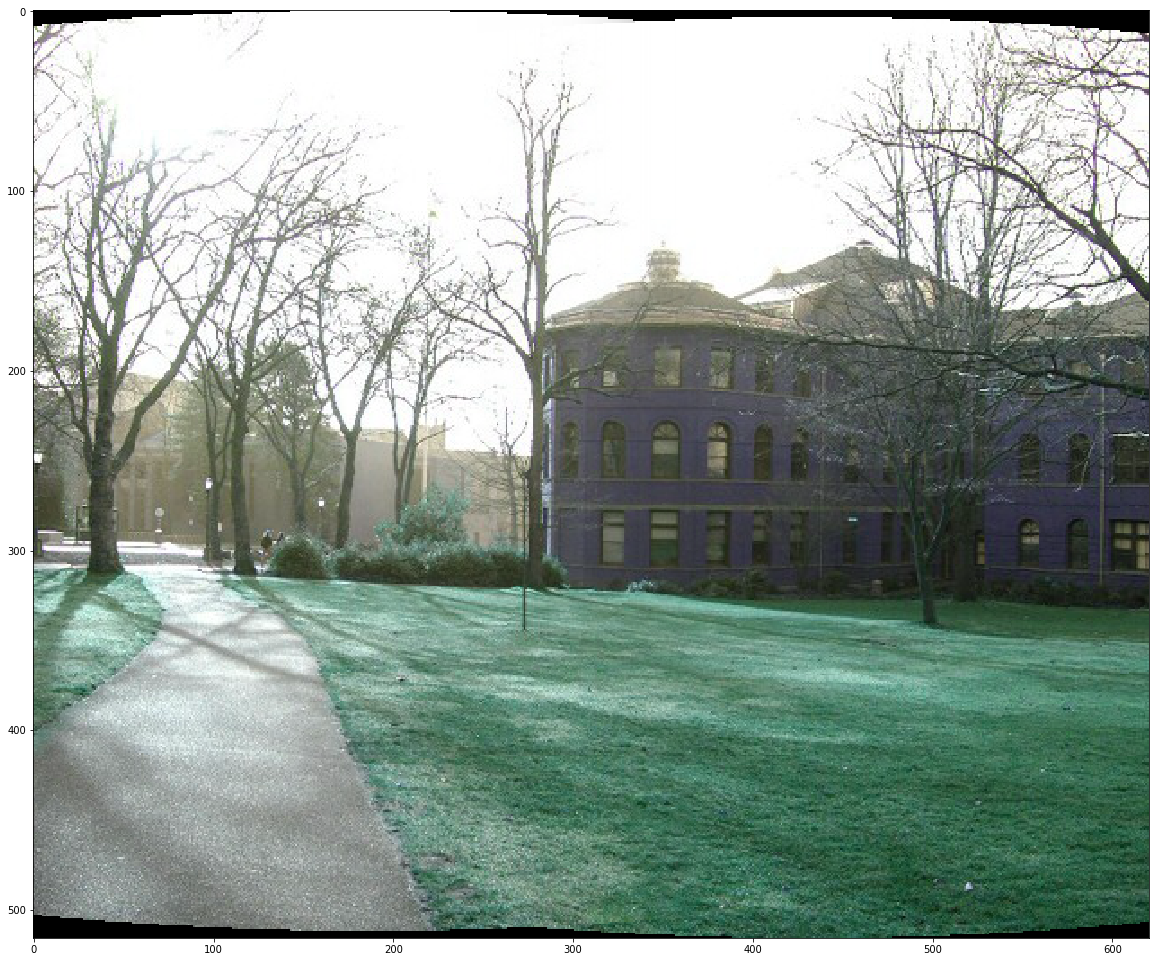

In [7]:
print('Blending image')
iii = blend.blending(blended_image, img, shift)

print(iii)
plt.figure(figsize=(20,20))
plt.imshow(iii)
plt.show()

In [9]:
for i in [1,2,3,4][1:]:
    print(i)

2
3
4


In [47]:
# img should bigger than img2
def blending(img1, img2, shift):
    blended_img = []
    
    # img2 at lower-left
    if shift[0] > 0 and shift[1] > 0:
        shifted_img = np.lib.pad(img1, [(shift[0], 0), (shift[1], 0), (0, 0)], 'constant', constant_values=0)
        h, w, _ = img2.shape
        _, width, _ = img2.shape

        for y in range(h):
            for x in range(w):
                if list(shifted_img[y][x]) != [0, 0, 0]:
                    color1 = shifted_img[y][x]
                    color2 = img2[y][x]
                    ratio = ((width - x)/shift[1])**3
                    shifted_img[y][x] = (1-ratio)*color1 + ratio*color2
                else:
                    shifted_img[y][x] = img2[y][x]
        blended_img = shifted_img
  
    return blended_img

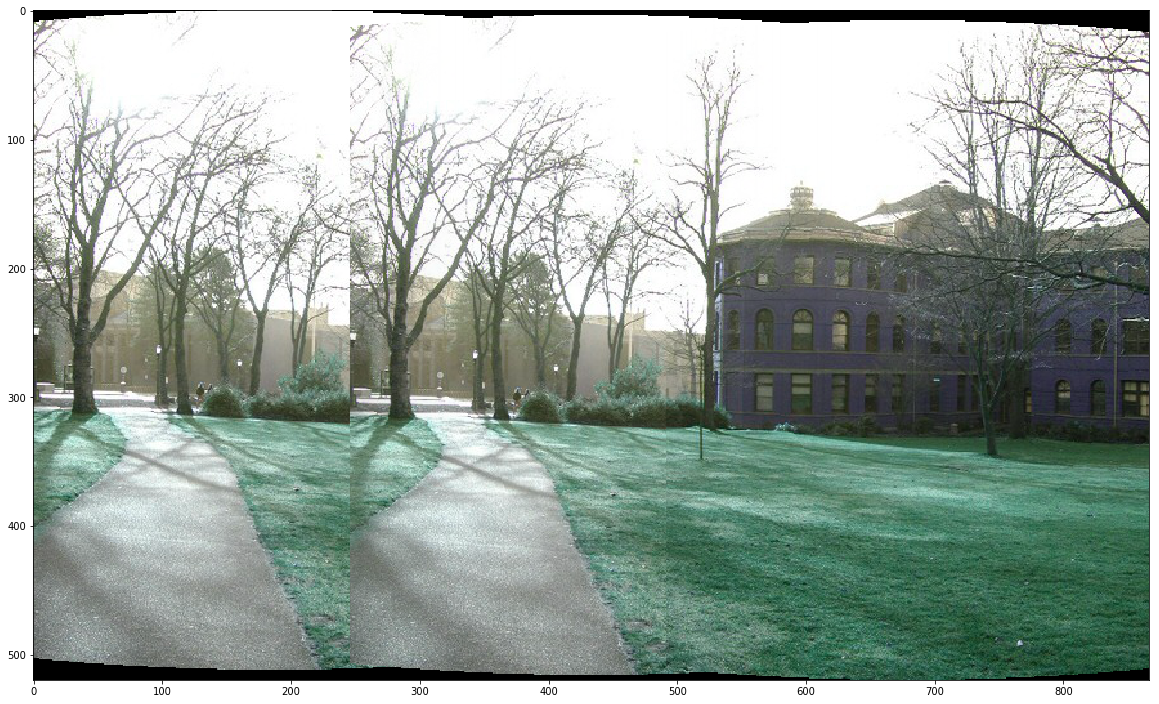

In [49]:
iii = blending(iii, img, shift)

plt.figure(figsize=(20,20))
plt.imshow(iii)
plt.show()